In [9]:
from astropy import units as u
from astropy import time

import numpy as np


from poliastro import iod
from poliastro.bodies import Earth, Mars, Sun
from poliastro.ephem import Ephem
from poliastro.maneuver import Maneuver
from poliastro.twobody import Orbit
from poliastro.util import time_range
from poliastro.plotting import OrbitPlotter3D, StaticOrbitPlotter
import math
from poliastro.twobody.propagation import propagate
from poliastro.examples import iss

from poliastro.twobody.propagation import cowell
from poliastro.util import norm

# More info: https://plotly.com/python/renderers/
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

from astropy.coordinates import solar_system_ephemeris


solar_system_ephemeris.set("jpl")


In [ ]:
accel = 2e-5
def constant_accel_factory(accel):
    def constant_accel(t0, u, k):
        v = u[3:]
        norm_v = (v[0]**2 + v[1]**2 + v[2]**2)**.5
        return accel * v / norm_v

    return constant_accel



In [10]:
# More info: https://plotly.com/python/renderers/
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
R = Earth.R.to(u.km).value
k = Earth.k.to(u.km ** 3 / u.s ** 2).value

orbit = Orbit.circular(Earth, 250 * u.km, epoch=Time(0.0, format="jd", scale="tdb"))

# parameters of a body
C_D = 2.2  # dimentionless (any value would do)
A_over_m = ((np.pi / 4.0) * (u.m ** 2) / (100 * u.kg)).to_value(
    u.km ** 2 / u.kg
)  # km^2/kg
B = C_D * A_over_m

# parameters of the atmosphere
rho0 = rho0_earth.to(u.kg / u.km ** 3).value  # kg/km^3
H0 = H0_earth.to(u.km).value

tofs = TimeDelta(np.linspace(0 * u.h, 100000 * u.s, num=2000))


def f(t0, state, k):
    du_kep = func_twobody(t0, state, k)
    ax, ay, az = atmospheric_drag_exponential(
        t0,
        state,
        k,
        R=R,
        C_D=C_D,
        A_over_m=A_over_m,
        H0=H0,
        rho0=rho0,
    )
    du_ad = np.array([0, 0, 0, ax, ay, az])

    return du_kep + du_ad


rr = propagate(
    orbit,
    tofs,
    method=cowell,
    events=f
)

TypeError: f() missing 1 required positional argument: 'k'

orbital decay seen after 100.0 days


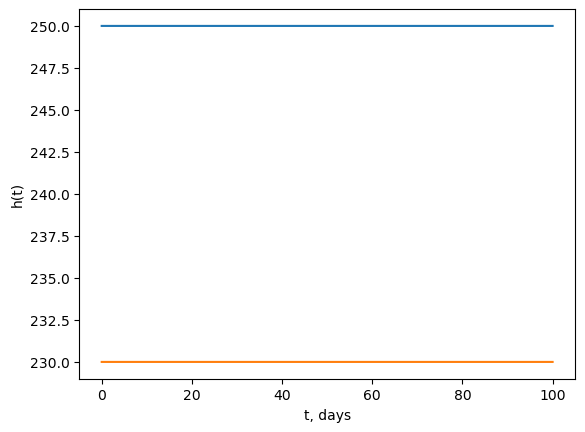

In [ ]:
plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, rr.norm() - Earth.R)
from poliastro.twobody.events import LithobrakeEvent

orbit = Orbit.circular(Earth, 230 * u.km, epoch=Time(0.0, format="jd", scale="tdb"))
tofs = TimeDelta(np.linspace(0 * u.h, 100 * u.d, num=2000))

lithobrake_event = LithobrakeEvent(R)
events = [lithobrake_event]

rr = propagate(
    orbit,
    tofs,
    method=cowell,
    events=events,
)

print("orbital decay seen after", lithobrake_event.last_t.to(u.d).value, "days")
plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, rr.norm() - Earth.R)